
Stock Price Prediction



In [47]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [13]:
#load data
dataset = yf.download('AAPL', start='2019-11-01', end='2023-10-28')


[*********************100%%**********************]  1 of 1 completed


In [14]:
#print data file

print(dataset)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-01   62.384998   63.982498   62.290001   63.955002   62.202354   
2019-11-04   64.332497   64.462502   63.845001   64.375000   62.610840   
2019-11-05   64.262497   64.547501   64.080002   64.282501   62.520878   
2019-11-06   64.192497   64.372498   63.842499   64.309998   62.547619   
2019-11-07   64.684998   65.087502   64.527496   64.857498   63.269501   
...                ...         ...         ...         ...         ...   
2023-10-23  170.910004  174.009995  169.929993  173.000000  173.000000   
2023-10-24  173.050003  173.669998  171.449997  173.440002  173.440002   
2023-10-25  171.880005  173.059998  170.649994  171.100006  171.100006   
2023-10-26  170.369995  171.380005  165.669998  166.889999  166.889999   
2023-10-27  166.910004  168.960007  166.830002  168.220001  168.220001   

               Volume  
Date         

In [16]:
# make independent variable
dataset['High-Low']=dataset['High']-dataset['Low']
dataset['Open-Close']=dataset['Open']-dataset['Close']


In [26]:
#store independent variables
x=dataset[['Open-Close','High-Low','Close']]

In [27]:
print(x)

            Open-Close  High-Low       Close
Date                                        
2019-11-01   -1.570004  1.692497   63.955002
2019-11-04   -0.042503  0.617500   64.375000
2019-11-05   -0.020004  0.467499   64.282501
2019-11-06   -0.117500  0.529999   64.309998
2019-11-07   -0.172501  0.560005   64.857498
...                ...       ...         ...
2023-10-23   -2.089996  4.080002  173.000000
2023-10-24   -0.389999  2.220001  173.440002
2023-10-25    0.779999  2.410004  171.100006
2023-10-26    3.479996  5.710007  166.889999
2023-10-27   -1.309998  2.130005  168.220001

[1004 rows x 3 columns]


In [23]:
#store target variable
y=np.where(dataset.Close.shift(-1) > dataset.Close , 1, 0)


In [24]:
print(y)

[1 0 1 ... 0 1 0]


In [28]:
#persentage to split data
persentage_split=0.9
row=int(dataset.shape[0]*persentage_split)

#train
x_train=x[:row]
y_train=y[:row]

#test
x_test=x[row:]
y_test=y[row:]

In [29]:
print(x)

            Open-Close  High-Low       Close
Date                                        
2019-11-01   -1.570004  1.692497   63.955002
2019-11-04   -0.042503  0.617500   64.375000
2019-11-05   -0.020004  0.467499   64.282501
2019-11-06   -0.117500  0.529999   64.309998
2019-11-07   -0.172501  0.560005   64.857498
...                ...       ...         ...
2023-10-23   -2.089996  4.080002  173.000000
2023-10-24   -0.389999  2.220001  173.440002
2023-10-25    0.779999  2.410004  171.100006
2023-10-26    3.479996  5.710007  166.889999
2023-10-27   -1.309998  2.130005  168.220001

[1004 rows x 3 columns]


In [30]:
print(x_train)


            Open-Close  High-Low       Close
Date                                        
2019-11-01   -1.570004  1.692497   63.955002
2019-11-04   -0.042503  0.617500   64.375000
2019-11-05   -0.020004  0.467499   64.282501
2019-11-06   -0.117500  0.529999   64.309998
2019-11-07   -0.172501  0.560005   64.857498
...                ...       ...         ...
2023-05-30   -0.339996  2.419998  177.300003
2023-05-31    0.080002  2.590012  177.250000
2023-06-01   -2.389999  3.190002  180.089996
2023-06-02    0.080002  2.520004  180.949997
2023-06-05    3.050003  6.910004  179.580002

[903 rows x 3 columns]


In [31]:
print(x_test)


            Open-Close  High-Low       Close
Date                                        
2023-06-06    0.759995  2.690002  179.210007
2023-06-07    0.619995  3.889999  177.820007
2023-06-08   -2.670013  3.379990  180.570007
2023-06-09    0.539993  1.599991  180.960007
2023-06-12   -2.519989  2.919998  183.789993
...                ...       ...         ...
2023-10-23   -2.089996  4.080002  173.000000
2023-10-24   -0.389999  2.220001  173.440002
2023-10-25    0.779999  2.410004  171.100006
2023-10-26    3.479996  5.710007  166.889999
2023-10-27   -1.309998  2.130005  168.220001

[101 rows x 3 columns]


In [ ]:
#build our model

!pip install sklearn
from sklearn.svm import SVC
model=SVC()
model.fit(x_train[['Open-Close','High-Low']], y_train)

In [33]:
# score train
model.score(x_train[['Open-Close','High-Low']], y_train)

0.5415282392026578

In [34]:
#score test
model.score(x_test[['Open-Close','High-Low']], y_test)

0.5148514851485149

In [35]:
# prediction
dataset['predictions']=model.predict(x[['Open-Close','High-Low']])
print(dataset['predictions'])

Date
2019-11-01    1
2019-11-04    1
2019-11-05    1
2019-11-06    1
2019-11-07    1
             ..
2023-10-23    1
2023-10-24    1
2023-10-25    1
2023-10-26    1
2023-10-27    1
Name: predictions, Length: 1004, dtype: int64


In [36]:
#todays inputs
dataset['In']=dataset['Close'].pct_change(1)
print(dataset['In'])

Date
2019-11-01         NaN
2019-11-04    0.006567
2019-11-05   -0.001437
2019-11-06    0.000428
2019-11-07    0.008513
                ...   
2023-10-23    0.000694
2023-10-24    0.002543
2023-10-25   -0.013492
2023-10-26   -0.024606
2023-10-27    0.007969
Name: In, Length: 1004, dtype: float64


In [37]:
#tomorrow inputs
dataset['Tomorrow']=dataset['predictions'].shift(1)*dataset['In']
print(dataset['Tomorrow'])

Date
2019-11-01         NaN
2019-11-04    0.006567
2019-11-05   -0.001437
2019-11-06    0.000428
2019-11-07    0.008513
                ...   
2023-10-23    0.000694
2023-10-24    0.002543
2023-10-25   -0.013492
2023-10-26   -0.024606
2023-10-27    0.007969
Name: Tomorrow, Length: 1004, dtype: float64


In [38]:
# sum today
dataset['sum_In_data']=dataset['In'].cumsum()
# sum tomorrow
dataset['sum_Tomorrow_data']=dataset['Tomorrow'].cumsum()


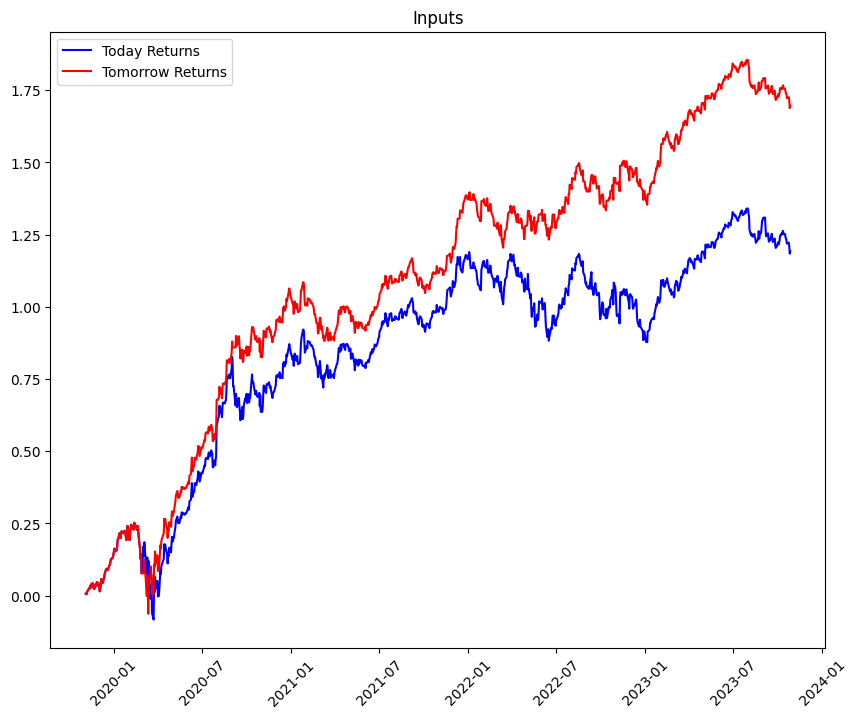

In [45]:
#plotting
plt.figure(figsize=(10,8))
plt.title('Inputs')
plt.plot(dataset['sum_In_data'],color='blue',label='Today Returns')
plt.plot(dataset['sum_Tomorrow_data'],color='red',label='Tomorrow Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()